# Image Classification with Tensorflow-Keras
- References : [Tensorflow documentation](https://www.tensorflow.org/tutorials/keras/classification)

In [1]:
# basic library
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
# tensorflow library
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)

Version:  2.3.1
Eager mode:  True
Hub version:  0.10.0


## Fashion MNIST Datasets
https://github.com/zalandoresearch/fashion-mnist

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
# 70,000 data (28x28) numpy array
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


## Data Preprocessing

### Labels (0 - 9) : 
- Label	Description
- 0	T-shirt/top
- 1	Trouser
- 2	Pullover
- 3	Dress
- 4	Coat
- 5	Sandal
- 6	Shirt
- 7	Sneaker
- 8	Bag
- 9	Ankle boot

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

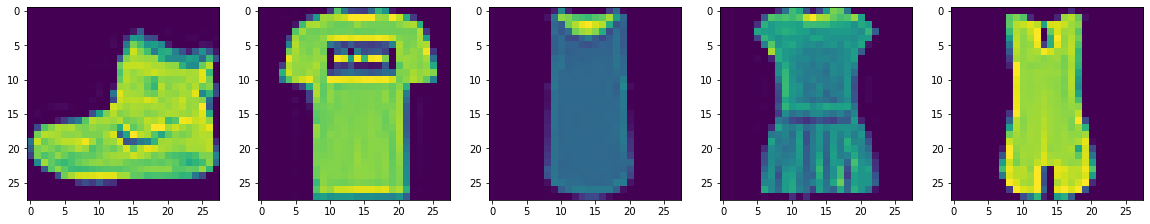

In [6]:
# inpsect first 5 image
fig, axarr = plt.subplots(ncols=5, figsize=(20,5))
for i in range(5):
    axarr[i].imshow(train_images[i])
    axarr[i].grid(False)

plt.show()

In [7]:
# scaling values to a range of 0 to 1
train_images = train_images / 255.0

test_images = test_images / 255.0

In [8]:
train_images[0][3] # value between 0 and 1

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00392157, 0.        , 0.        ,
       0.05098039, 0.28627451, 0.        , 0.        , 0.00392157,
       0.01568627, 0.        , 0.        , 0.        , 0.        ,
       0.00392157, 0.00392157, 0.        ])

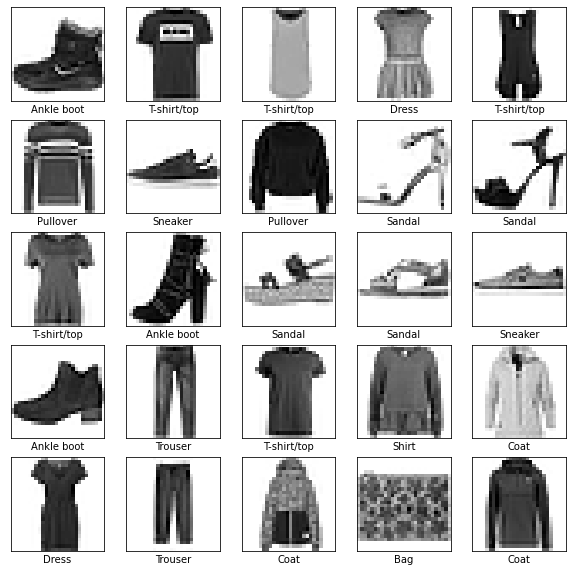

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build a model
- Using Keras Sequential model
- Input layer using tf.keras.layers.Flatten to transform image 2d array(28x28) to 1d array(784)
- 2 hidden layer with 128 and 64 nodes and ReLu activation
- Output layer with 10 nodes

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])


## Compile model
- Using adam optimizer
- Loss function using SparseCategoricalCrossentropy
- with accuracy as a metrics

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Training a model

In [12]:
# using 10 epochs
model.fit(train_images, train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4965 - accuracy: 0.8209
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3652 - accuracy: 0.8665
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3308 - accuracy: 0.8780
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3085 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2916 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2761 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2635 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2526 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2428 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.235

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'\nTest Accuracy : {test_acc}')
print(f'Test Loss : {test_loss}')

313/313 - 0s - loss: 0.3385 - accuracy: 0.8819

Test Accuracy : 0.8819000124931335
Test Loss : 0.3384655714035034


## Make predictions

In [14]:
# create prediction model with adding Softmax as an activation function
model_predict = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

# predict all test_images
predictions = model_predict.predict(test_images)

In [15]:
# see result with np.argmax(return maximum value at index n)
np.argmax(predictions[0])

9

In [16]:
# check actual result from label
test_labels[0]

9

## Verify Prediction with probability percentage display

In [17]:
# create function plot image and plot probability display
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

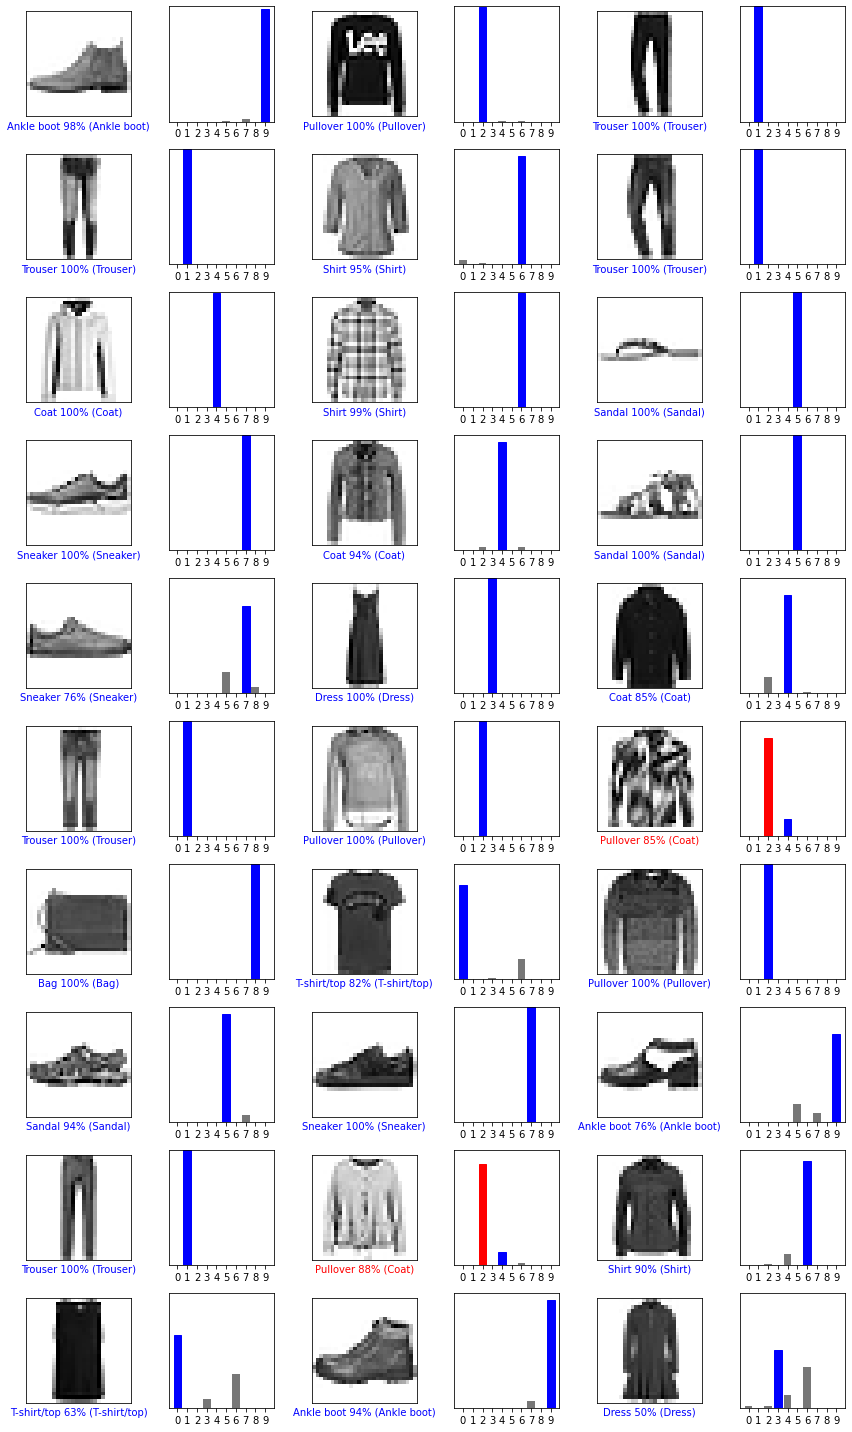

In [18]:
# plot first 30 image from test_images
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()